<a href="https://colab.research.google.com/github/ValentinTrita/ValentinTrita/blob/main/test%20tema%20regresie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2254]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd



In [2255]:
print(tf.__version__)

2.9.2


In [2256]:
dataset = pd.read_csv('Tema regresie liniara1.csv' , date_parser = True)

In [2257]:
dataset.head()

,An,Numar Abonati
0,1968,183266
1,2001,304955
2,2001,584794
3,2023,964353
4,2008,868352


In [2258]:
dataset2 = dataset.copy()

In [2259]:
dataset2.head()

,An,Numar Abonati
0,1968,183266
1,2001,304955
2,2001,584794
3,2023,964353
4,2008,868352


In [2260]:
dataset2.head()

,An,Numar Abonati
0,1968,183266
1,2001,304955
2,2001,584794
3,2023,964353
4,2008,868352


In [2261]:
len(dataset2.index)

1000

In [2262]:
dataset2.isna().sum()

An               0
Numar Abonati    0
dtype: int64

In [2263]:
len(dataset2.index)

1000

In [2264]:
dataset2 = dataset2[(dataset2 > 0).all (axis=1)]

In [2265]:
len(dataset2.index)

1000

In [2266]:
dataset2 = dataset2.round({'An':1})

In [2267]:
dataset2.tail()

,An,Numar Abonati
995,2065,373383
996,2038,297850
997,2046,881074
998,1970,495842
999,2065,980357


In [2268]:
len(dataset2.index)

1000

In [2269]:
dataset2 = dataset2.sort_values('An')

In [2270]:
dataset2.head()

,An,Numar Abonati
685,1950,436826
690,1950,682739
646,1950,297445
474,1950,922789
133,1950,741150


In [2271]:
train_dataset = dataset2.sample(frac=0.8, random_state=0)

In [2272]:
train_dataset = dataset2

In [2273]:
test_dataset = dataset2.drop(train_dataset.index)

In [2274]:
len(test_dataset.index)

0

In [2275]:
len(train_dataset.index)

1000

In [2276]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2277]:
X_train = train_dataset[['An']].copy()
df = pd.DataFrame(X_train)
x = df.values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = x_scaled
X_train = np.array(df)
X_train = np.reshape(df, (1000,))

In [2278]:
Y_train = train_dataset[['Numar Abonati']].copy()
df = pd.DataFrame(X_train)
x = df.values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = x_scaled
Y_train = np.array(df)
Y_train = np.reshape(df, (1000,))

In [2279]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2280]:
regresor=Sequential()
regresor.add(Dense(units=1,input_shape=[1,]))

regresor.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [2281]:
regresor.compile(optimizer='adam', loss= 'mean_squared_error')
regresor.fit(X_train, Y_train, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 0.0612
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.0417
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.0137


In [2282]:
x = tf.linspace(0, 1,100 )
y = regresor.predict(x)

4/4 [==============================] - 0s 3ms/step


In [2283]:
def plot_regresie(x, y):
  plt.scatter(train_dataset['An'], train_dataset['Numar Abonati'], label='Data')
  plt.plot(x* 2078, y* 237599, color='k', label='Predictions')
  plt.xlabel('Numar Abonati')
  plt.ylabel('An')
  plt.legend()
  

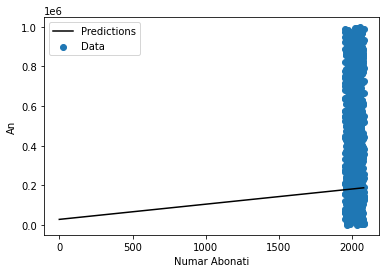

In [2284]:
plot_regresie(x, y)

In [2285]:
train_dataset, test_dataset

(       An  Numar Abonati
 685  1950         436826
 690  1950         682739
 646  1950         297445
 474  1950         922789
 133  1950         741150
 ..    ...            ...
 508  2078         189658
 648  2078         165603
 447  2078         668267
 717  2078           7340
 687  2078         237599
 
 [1000 rows x 2 columns], Empty DataFrame
 Columns: [An, Numar Abonati]
 Index: [])